## Importing Required Lib.

In [10]:
import random
import faker
import mysql.connector

# Generating The Fake Data

In [11]:
# Create Faker instance
fake = faker.Faker()

# Function to generate fake customer data
def generate_customers(num_customers):
    customers = []
    for _ in range(num_customers):
        customer = {
            'customer_name': fake.company(),
            'customer_address': fake.address(),
            'customer_contact': fake.phone_number()
        }
        customers.append(customer)
    return customers

# Function to generate fake product data
def generate_products(num_products, num_categories, warehouses, manufacturing_units):
    categories = ['Agriculture', 'Water Tanks', 'Sanitary', 'Plumbing', 'Industrial', 'PTMT Bath Fittings', 'Water Tank Cleaning Solutions', 'New']
    products = []
    for _ in range(num_products):
        product = {
            'product_name': fake.word(),
            'category_id': random.randint(1, num_categories),
            'warehouse_id': random.choice(warehouses)['warehouse_id'],
            'unit_id': random.choice(manufacturing_units)['unit_id']
        }
        products.append(product)
    return products

# Function to generate fake sales data
def generate_sales(num_sales, customers, products):
    sales = []
    for _ in range(num_sales):
        sale = {
            'customer_id': random.randint(1, len(customers)),
            'product_id': random.randint(1, len(products)),
            'quantity': random.randint(1, 600),
            'sale_date': fake.date_this_decade()
        }
        sales.append(sale)
    return sales

# Function to generate fake employee data
def generate_employees(num_employees):
    employees = []
    departments = ['Sales', 'Marketing', 'Finance', 'Operations', 'Human Resources', 'IT']
    designations = ['Manager', 'Supervisor', 'Executive', 'Coordinator', 'Assistant']
    for _ in range(num_employees):
        employee = {
            'employee_name': fake.name(),
            'department': random.choice(departments),
            'designation': random.choice(designations)
        }
        employees.append(employee)
    return employees

# Function to generate fake export data
def generate_exports(num_exports, products):
    exports = []
    countries = ['Singapore', 'Middle East', 'Europe', 'Russia', 'Australia', 'India']
    for _ in range(num_exports):
        export = {
            'product_id': random.randint(1, len(products)),
            'destination_country': random.choice(countries),
            'quantity': random.randint(1, 600),
            'export_date': fake.date_this_decade()
        }
        exports.append(export)
    return exports

# Function to generate fake manufacturing unit data
def generate_manufacturing_units(num_units):
    units = []
    locations = ['Location A', 'Location B', 'Location C', 'Location D']
    for i in range(num_units):
        unit = {
            'unit_id': i + 1,
            'unit_name': fake.company(),
            'location': random.choice(locations)
        }
        units.append(unit)
    return units

# Function to generate fake warehouse data
def generate_warehouses(num_warehouses):
    warehouses = []
    locations = ['Location A', 'Location B', 'Location C', 'Location D']
    for i in range(num_warehouses):
        warehouse = {
            'warehouse_id': i + 1,
            'warehouse_name': fake.company(),
            'location': random.choice(locations)
        }
        warehouses.append(warehouse)
    return warehouses

In [3]:
# Function to check if a table exists
def table_exists(cursor, table_name):
    cursor.execute("SHOW TABLES LIKE %s", (table_name,))
    return cursor.fetchone() is not None

# Function to create MySQL database and insert data
def create_database(customers, products, sales, employees, exports, manufacturing_units, warehouses):
    # Connect to MySQL
    conn = mysql.connector.connect(
        host="localhost",
        user="root",
        password="Sank#000",
        database="raksha_pipesdata"
    )
    cursor = conn.cursor()

    try:
        # Create Warehouses table if it doesn't exist
        if not table_exists(cursor, 'Warehouses'):
            cursor.execute("CREATE TABLE Warehouses (warehouse_id INT AUTO_INCREMENT PRIMARY KEY, warehouse_name VARCHAR(255), location VARCHAR(255))")

        # Create Manufacturing_Units table if it doesn't exist
        if not table_exists(cursor, 'Manufacturing_Units'):
            cursor.execute("CREATE TABLE Manufacturing_Units (unit_id INT AUTO_INCREMENT PRIMARY KEY, unit_name VARCHAR(255), location VARCHAR(255))")

        # Create Categories table if it doesn't exist
        if not table_exists(cursor, 'Categories'):
            cursor.execute("CREATE TABLE Categories (category_id INT AUTO_INCREMENT PRIMARY KEY, category_name VARCHAR(255))")
            # Insert sample categories
            categories = [('Agriculture',), ('Water Tanks',), ('Sanitary',), ('Plumbing',), ('Industrial',), ('PTMT Bath Fittings',), ('Water Tank Cleaning Solutions',), ('New',)]
            cursor.executemany("INSERT INTO Categories (category_name) VALUES (%s)", categories)

        # Create Customers table if it doesn't exist
        if not table_exists(cursor, 'Customers'):
            cursor.execute("CREATE TABLE Customers (customer_id INT AUTO_INCREMENT PRIMARY KEY, customer_name VARCHAR(255), customer_address VARCHAR(255), customer_contact VARCHAR(255))")

        # Create Products table if it doesn't exist
        if not table_exists(cursor, 'Products'):
            cursor.execute("CREATE TABLE Products (product_id INT AUTO_INCREMENT PRIMARY KEY, product_name VARCHAR(255), category_id INT, warehouse_id INT, unit_id INT, FOREIGN KEY (category_id) REFERENCES Categories(category_id), FOREIGN KEY (warehouse_id) REFERENCES Warehouses(warehouse_id), FOREIGN KEY (unit_id) REFERENCES Manufacturing_Units(unit_id))")

        # Create Sales table if it doesn't exist
        if not table_exists(cursor, 'Sales'):
            cursor.execute("CREATE TABLE Sales (sale_id INT AUTO_INCREMENT PRIMARY KEY, customer_id INT, product_id INT, quantity INT, sale_date DATE, FOREIGN KEY (customer_id) REFERENCES Customers(customer_id), FOREIGN KEY (product_id) REFERENCES Products(product_id))")

        # Create Employees table if it doesn't exist
        if not table_exists(cursor, 'Employees'):
            cursor.execute("CREATE TABLE Employees (employee_id INT AUTO_INCREMENT PRIMARY KEY, employee_name VARCHAR(255), department VARCHAR(255), designation VARCHAR(255))")

        # Create Exports table if it doesn't exist
        if not table_exists(cursor, 'Exports'):
            cursor.execute("CREATE TABLE Exports (export_id INT AUTO_INCREMENT PRIMARY KEY, product_id INT, destination_country VARCHAR(255), quantity INT, export_date DATE, FOREIGN KEY (product_id) REFERENCES Products(product_id))")

        # Insert data into tables
        for customer in customers:
            cursor.execute("INSERT INTO Customers (customer_name, customer_address, customer_contact) VALUES (%s, %s, %s)", (customer['customer_name'], customer['customer_address'], customer['customer_contact']))
        for warehouse in warehouses:
            cursor.execute("INSERT INTO Warehouses (warehouse_name, location) VALUES (%s, %s)", (warehouse['warehouse_name'], warehouse['location']))
        for unit in manufacturing_units:
            cursor.execute("INSERT INTO Manufacturing_Units (unit_name, location) VALUES (%s, %s)", (unit['unit_name'], unit['location']))
        for product in products:
            cursor.execute("INSERT INTO Products (product_name, category_id, warehouse_id, unit_id) VALUES (%s, %s, %s, %s)", (product['product_name'], product['category_id'], product['warehouse_id'], product['unit_id']))
        for sale in sales:
            cursor.execute("INSERT INTO Sales (customer_id, product_id, quantity, sale_date) VALUES (%s, %s, %s, %s)", (sale['customer_id'], sale['product_id'], sale['quantity'], sale['sale_date']))
        for employee in employees:
            cursor.execute("INSERT INTO Employees (employee_name, department, designation) VALUES (%s, %s, %s)", (employee['employee_name'], employee['department'], employee['designation']))
        for export in exports:
            cursor.execute("INSERT INTO Exports (product_id, destination_country, quantity, export_date) VALUES (%s, %s, %s, %s)", (export['product_id'], export['destination_country'], export['quantity'], export['export_date']))

        # Commit changes
        conn.commit()
    except Exception as e:
        # Rollback changes if an error occurs
        print("An error occurred:", e)
        conn.rollback()
    finally:
        # Close cursor and connection
        cursor.close()
        conn.close()

In [4]:
# Generate fake data
num_customers = 200
num_products = 20
num_sales = 1500
num_employees = 20
num_exports = 10
num_units = 3
num_warehouses = 8
num_categories = 8  # Number of categories

In [5]:
customers = generate_customers(num_customers)
warehouses = generate_warehouses(num_warehouses)
manufacturing_units = generate_manufacturing_units(num_units)
products = generate_products(num_products, num_categories, warehouses, manufacturing_units)
sales = generate_sales(num_sales, customers, products)
employees = generate_employees(num_employees)
exports = generate_exports(num_exports, products)

In [6]:
# Create MySQL database and insert data
create_database(customers, products, sales, employees, exports, manufacturing_units, warehouses)

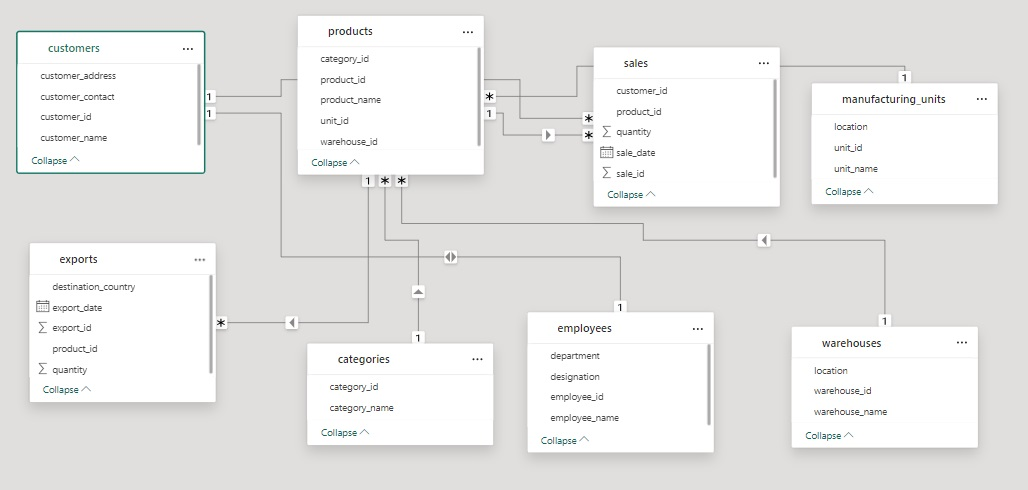